In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("news dataset.csv.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
texts=df['review']
labels=df["sentiment"]

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
tfi=TfidfVectorizer(stop_words=stopwords.words('english'))
x = tfi.fit_transform(texts)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.2,random_state=32)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print("== Classification Report ==")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4912
    positive       0.89      0.91      0.90      5088

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [15]:
cm = confusion_matrix(y_test, y_pred)

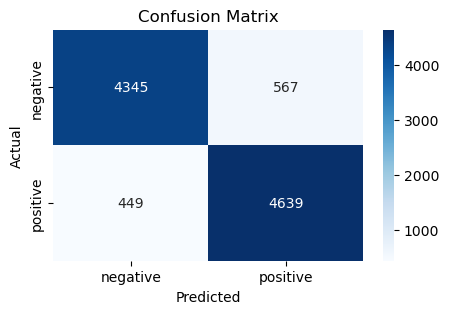

In [19]:
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()